# Python Viz Homework
### Cleaned Up Version

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

## Viz 1
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should
-Show cases over time
-Have all counties plotted in a background color (something like grey)
-Have a single county plotted in a contrasting color (something not grey)
-Have well formatted dates as the X axis

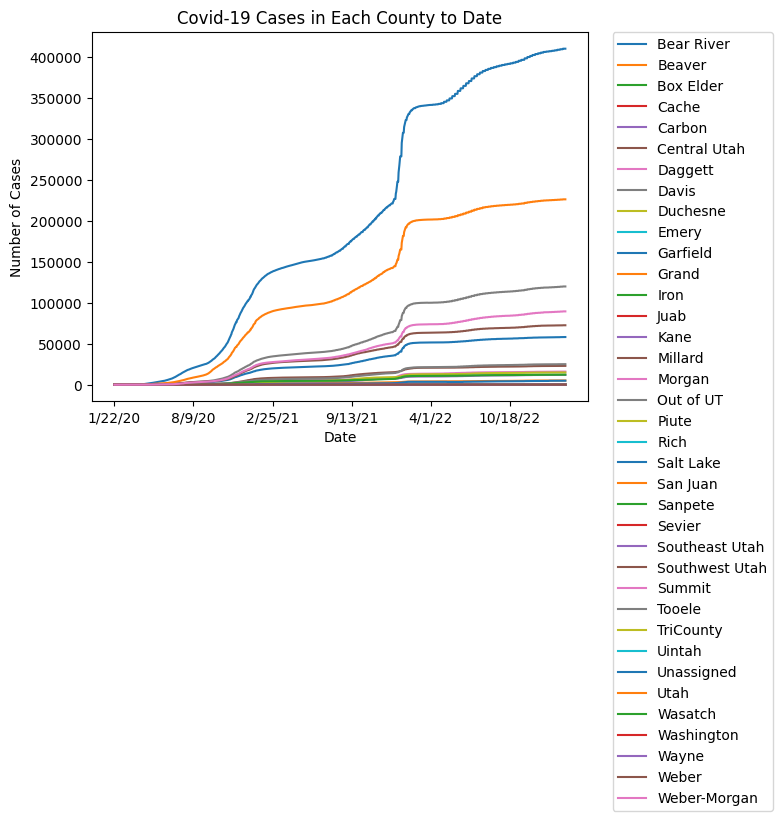

In [4]:
# extract data only for Utah county cases
ut_cases = covid_df.loc[(covid_df['Province_State'] == "Utah")]
# rename columns for readability
ut_cases = ut_cases.rename(columns={'Admin2': 'County', 'Province_State': 'State', 'Country_Region':'Country'})
# collect list of all column names
cols = list(ut_cases.columns.values)
# create list with only the columns with dates as names
cols_dates = cols[10:-1]
# create a list that will have County as the first column, followed by all the date columns using a for loop
plot_columns = ['County']
for val in cols_dates:
    plot_columns.append(val)
# create dataframe with only county names, dates, and values
county_cases = pd.DataFrame(ut_cases, columns=plot_columns)

# plot everything
county_cases.set_index('County').T.plot()
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("Covid-19 Cases in Each County to Date")
# plt.figure(figsize=(10,6))
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) # move legend outside of graph box so it doesn't overlap data points
# I'm not sure how to get salt lake's line to be red, and get graph to be wider 



## Viz 2
Create a visualization that shows the contrast between the county in Utah with the most cases to date to a county in Florida with the most cases to date. The graphic should: -Have only two counties plotted -Highlight the difference between the two comparison counties You may use any style of graphic you like as long as it is effective (dense) and readable

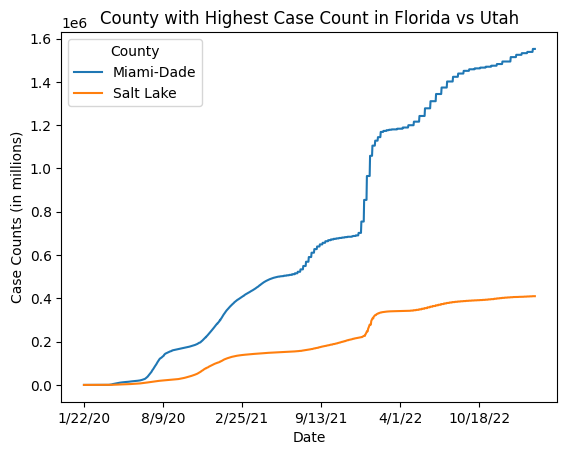

In [5]:
# Extract data for Florida and Utah cases
fl_vs_ut = covid_df.loc[(covid_df['Province_State'] == "Florida") | (covid_df['Province_State'] == "Utah")]
# Rename columns for readability
fl_vs_ut = fl_vs_ut.rename(columns={'Admin2': 'County', 'Province_State': 'State', 'Country_Region':'Country'})
# get list of column names for only the county and state name, and dates
cols = list(fl_vs_ut.columns.values)
cols_dates = cols[10:-1]
cnty_total = fl_vs_ut.groupby([cols[5], cols[4]])[cols_dates[-1]].max()
# create dataframe with only the columns of data needed for the visualization
cnty_total = pd.DataFrame(cnty_total)
# find which county has the highest case counts in each state
cnty_total.sort_values(by=['3/8/23'], ascending=False)
#Collect case counts for the two highest counties and turn into dataframe
cty_2_cty = fl_vs_ut.loc[(fl_vs_ut['County'] == 'Miami-Dade') | (fl_vs_ut['County'] == 'Salt Lake')]
# Create plot
cty_2_cty = pd.DataFrame(cty_2_cty, columns=plot_columns)
cty_2_cty.set_index('County').T.plot()
plt.xlabel("Date")
plt.ylabel("Case Counts (in millions)")
plt.title("County with Highest Case Count in Florida vs Utah")
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=15)

## Viz 3
Create a visualization that shows BOTH the running total of cases for a single county AND the daily new cases. The graphic should: -Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html) -Use color to contrast the two series being plotted -Have well formatted dates as the X axis

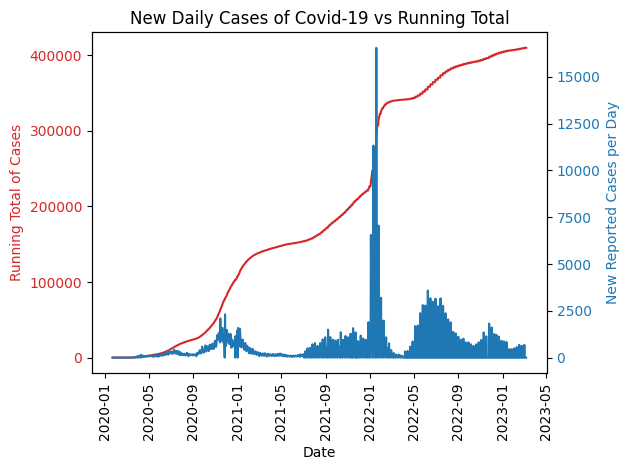

In [6]:
# Get case counts for Salt Lake County
slc_cases = fl_vs_ut.loc[(fl_vs_ut['County'] == 'Salt Lake')]
# create dataframe and select which columns you want (only date columns)
slc_cases = pd.DataFrame(slc_cases, columns=plot_columns[1:-1])
#stack dataframe so column names are now values (the dates)
slc_running_total =pd.DataFrame(slc_cases.stack())
# rename columns for readability
slc_running_total = slc_running_total.rename(columns={0: 'Running Total'})
# make dates be column values and not indexes
slc_running_total = slc_running_total.reset_index(level=(1,))
# rename column for readability
slc_running_total = slc_running_total.rename(columns={'level_1': 'Date'})

# this function calculates the difference in case counts between the current day and the previous day
# to calculate the daily increase in cases.
prev = 0
def daily_increase(cases):
    global prev 
    global diff
    diff = cases - prev
    prev = cases

    return diff

# run each value in the running total column through the daily_increase function and put it into a new dataframe
daily = pd.DataFrame(slc_running_total['Running Total'].apply(daily_increase))
daily = daily.rename(columns={'Running Total': 'Daily Increase'})

# I am going to create an array of dates that are in datetime format, so that x axis of graph looks better
# Start and end dates
start_date = datetime(2020, 1, 22)
end_date = datetime(2023, 3, 7)
# Create a list of dates
dts = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]
# create list of running total values
srt = list(slc_running_total['Running Total'])
# create list of daily increase values
di = list(daily['Daily Increase'])

# create the plot
fig, ax1 = plt.subplots()
plt.title("New Daily Cases of Covid-19 vs Running Total")

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Running Total of Cases', color=color)
ax1.plot(dts, srt, color=color)
ax1.tick_params(axis='y', labelcolor=color)
# labelrotation rotates the x-axis labels so they're vertical, giving more space between the labels
ax1.tick_params(axis='x', labelrotation=90) 

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New Reported Cases per Day', color=color)  # we already handled the x-label with ax1
ax2.plot(dts, di, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Viz 4
Create a visualization that shows a stacked bar chart of county contributions to a given state's total cases. You may choose any state (or states). (https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py) The graphic should: -Have a single column delineate a state -Have each 'slice' or column compontent represent a county

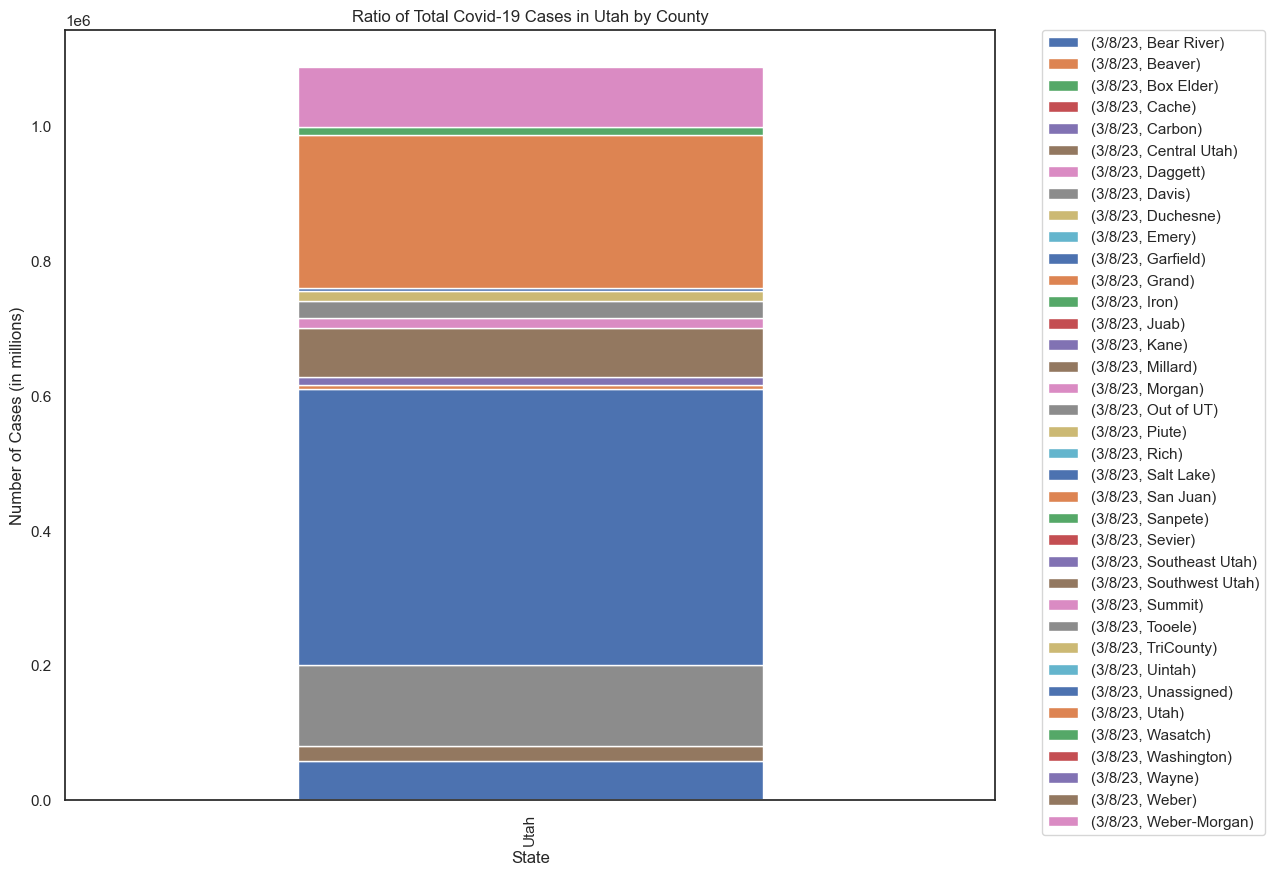

In [61]:
# select the ending total count for each county, as well as the county names and state name
utah_max = pd.DataFrame(ut_cases, columns=['State', 'County', '3/8/23'])
# pivot table so that its format better fits syntax of stacked bar plots.  
utah_pivot = utah_max.pivot(index ='State', columns ='County', values =['3/8/23'])

#set seaborn plotting aesthetics
sns.set(style='white')

# #create stacked bar chart
utah_pivot.plot(kind='bar', stacked=True, figsize=(12,10), title="Ratio of Total Covid-19 Cases in Utah by County")
plt.ylabel("Number of Cases (in millions)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)